In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier, DMatrix, train
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

# Import Data

1. Import data.
2. Print DataFrame information.
3. The missing values labeled as '?' will be replaced by NaN.
4. Check how many missing values in each column.

In [82]:
cc_apps = pd.read_csv("datasets/cc_approvals.data", header=None)
print(cc_apps.info())
cc_apps = cc_apps.replace('?', np.nan)
print('\nNumber of missing values in each column:')
print(cc_apps.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None

Number of missing values in each column:
0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
1

Handling of missing data:
    1. Impute the missing numeric values with mean imputation.
    2. Impute the missing non-numeric values with the most frequent value in the respective column.
    3. Check if there is any missing value.

In [83]:
cc_apps.fillna(cc_apps.mean(), inplace=True)

for col in cc_apps.columns:
    if cc_apps[col].dtypes == 'object':
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

print(cc_apps.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


Preprocessing:
    1. Convert the non-numeric data into numeric.
    2. Drop unnecessary features.
    3. Separate variables from result column.
    4. Split the data into test and train data, a ratio of 1:2.
    5. Rescale X_train and X_test to values from 0 to 1.

In [84]:
le=LabelEncoder()

for col in cc_apps.columns.to_numpy():
    if cc_apps[col].dtypes=='object':
        cc_apps[col]=le.fit_transform(cc_apps[col])
        

X = cc_apps.iloc[:,0:15]
y = cc_apps.iloc[:,15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection

Select the best features based on ANOVA F-value.

Feature: 0, Score: 0.4
Feature: 1, Score: 11.5
Feature: 2, Score: 16.4
Feature: 3, Score: 18.3
Feature: 4, Score: 18.4
Feature: 5, Score: 6.7
Feature: 6, Score: 0.0
Feature: 7, Score: 57.1
Feature: 8, Score: 530.5
Feature: 9, Score: 120.2
Feature: 10, Score: 86.8
Feature: 11, Score: 2.8
Feature: 12, Score: 6.2
Feature: 13, Score: 1.1
Feature: 14, Score: 14.1


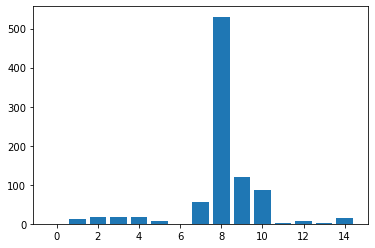

In [85]:
test = SelectKBest(score_func=f_classif, k=15)
fitscores = test.fit(X_train, y_train)
importance = fitscores.scores_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.1f' % (i,v))
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

A Linear Regression model is fitted on the dataset and the coefficients calculated for each input variable is retrieved. These coefficients can provide the basis for a crude feature importance score.

Feature: 0, Score: 0.0
Feature: 1, Score: -0.1
Feature: 2, Score: 0.1
Feature: 3, Score: 1.3
Feature: 4, Score: -0.6
Feature: 5, Score: -0.1
Feature: 6, Score: -0.1
Feature: 7, Score: -0.3
Feature: 8, Score: -0.6
Feature: 9, Score: -0.1
Feature: 10, Score: -0.4
Feature: 11, Score: 0.0
Feature: 12, Score: 0.1
Feature: 13, Score: 0.0
Feature: 14, Score: -0.7


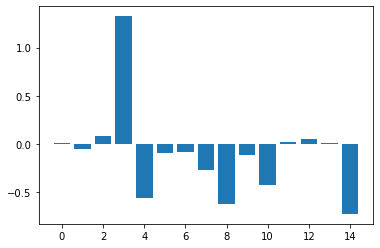

In [86]:
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)
importance = LRmodel.coef_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.1f' % (i,v))
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

A Logistic Regression model is fitted on the dataset and the coefficients calculated for each input variable is retrieved. These coefficients can provide the basis for a crude feature importance score.

Feature: 0, Score: 0.0
Feature: 1, Score: -0.4
Feature: 2, Score: -0.1
Feature: 3, Score: 1.9
Feature: 4, Score: 0.2
Feature: 5, Score: -0.4
Feature: 6, Score: -0.2
Feature: 7, Score: -1.1
Feature: 8, Score: -3.4
Feature: 9, Score: -1.0
Feature: 10, Score: -0.6
Feature: 11, Score: 0.2
Feature: 12, Score: 0.0
Feature: 13, Score: -0.4
Feature: 14, Score: -1.2


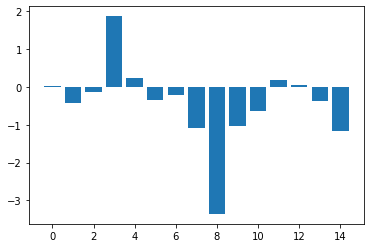

In [87]:
LogRegmodel = LogisticRegression(solver='lbfgs', max_iter=10000)

LogRegmodel.fit(X_train, y_train)

importance = LogRegmodel.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.1f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


Select the best features using the Decision Tree Classifier model.

Feature: 0, Score: 0.01
Feature: 1, Score: 0.05
Feature: 2, Score: 0.07
Feature: 3, Score: 0.03
Feature: 4, Score: 0.01
Feature: 5, Score: 0.04
Feature: 6, Score: 0.03
Feature: 7, Score: 0.04
Feature: 8, Score: 0.54
Feature: 9, Score: 0.05
Feature: 10, Score: 0.00
Feature: 11, Score: 0.01
Feature: 12, Score: 0.00
Feature: 13, Score: 0.09
Feature: 14, Score: 0.04


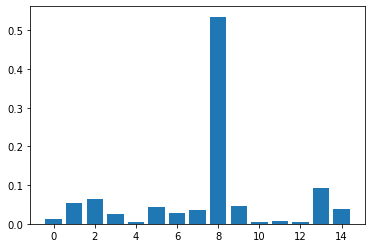

In [88]:
DTCmodel = DecisionTreeClassifier()
DTCmodel.fit(X_train, y_train)
importance = DTCmodel.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Select the best features using the Random Forest model.

Feature: 0, Score: 0.013
Feature: 1, Score: 0.078
Feature: 2, Score: 0.084
Feature: 3, Score: 0.014
Feature: 4, Score: 0.015
Feature: 5, Score: 0.057
Feature: 6, Score: 0.029
Feature: 7, Score: 0.105
Feature: 8, Score: 0.288
Feature: 9, Score: 0.058
Feature: 10, Score: 0.084
Feature: 11, Score: 0.012
Feature: 12, Score: 0.010
Feature: 13, Score: 0.075
Feature: 14, Score: 0.078


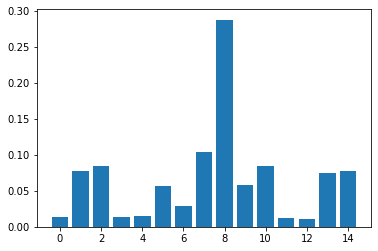

In [89]:
RFCmodel = RandomForestClassifier()
RFCmodel.fit(X_train, y_train)
importance = RFCmodel.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Select the best features using the XGBoost model.

Feature: 0, Score: 0.042
Feature: 1, Score: 0.021
Feature: 2, Score: 0.035
Feature: 3, Score: 0.030
Feature: 4, Score: 0.000
Feature: 5, Score: 0.029
Feature: 6, Score: 0.026
Feature: 7, Score: 0.034
Feature: 8, Score: 0.563
Feature: 9, Score: 0.065
Feature: 10, Score: 0.044
Feature: 11, Score: 0.018
Feature: 12, Score: 0.000
Feature: 13, Score: 0.046
Feature: 14, Score: 0.048


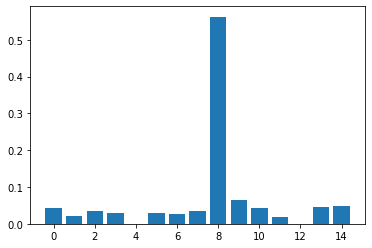

In [90]:
XGBmodel = XGBClassifier(learning_rate=0.1, max_depth = 10, min_child_weight = 4, gamma = 0.26, subsample=1,
                         scale_pos_weight=0.9, objective='binary:logistic', eval_metric = "logloss",use_label_encoder=False)

XGBmodel.fit(X_train, y_train)
importance = XGBmodel.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.3f' % (i,v))
    
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Select the best features using the KNN model.

Feature: 0, Score: 0.01169
Feature: 1, Score: -0.00043
Feature: 2, Score: -0.00476
Feature: 3, Score: 0.00043
Feature: 4, Score: -0.00130
Feature: 5, Score: 0.00519
Feature: 6, Score: 0.00087
Feature: 7, Score: 0.00346
Feature: 8, Score: 0.28571
Feature: 9, Score: 0.04632
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00130
Feature: 12, Score: -0.00433
Feature: 13, Score: -0.00087
Feature: 14, Score: 0.00000


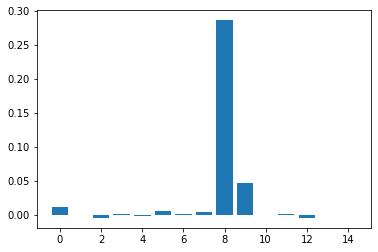

In [91]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train, y_train)

results = permutation_importance(KNNmodel, X_train, y_train, scoring='accuracy')
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Perform the train-test split again

In [92]:
X = cc_apps.iloc[:,0:15]
X = X[[2, 4, 7, 8, 9, 10, 14]] 
y = cc_apps.iloc[:,15]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression

Perform a grid search of the logistic regression model parameters to calculate the best parameters:

In [93]:
tol = [0.1, 0.01, 0.001 ,0.0001, 0.00001]
max_iter = [i for i in range(100,10001,100)]

param_grid = dict(tol=tol, max_iter=max_iter)

logreg = LogisticRegression()
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

grid_model_result = grid_model.fit(X_train, y_train)

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.865802 using {'max_iter': 100, 'tol': 0.1}


Perform a logistic regression with the best set of parameters.

In [94]:
logreg = LogisticRegression(tol=0.1, max_iter=100)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

Evaluate the performance of the model.

In [95]:
print("Accuracy: ", accuracy_score(y_test, y_pred ))

Accuracy:  0.8377192982456141


# Random Forest Classifier

In [96]:
max_features = [2,3,4,5,6,7]
min_samples_leaf = [2,3,4,5,6]
max_depth = [8,9,10,11,12,13,14,15,16,17]
column_names = ['max_features', 'min_samples_leaf', 'max_depth', 'Score']
results = pd.DataFrame(columns = column_names)


for i in max_features:
    for j in min_samples_leaf:
        for k in max_depth:
            clf = RandomForestClassifier(n_estimators= 100, max_depth = k, min_samples_leaf = j, max_features = i)
            clf.fit(X_train, y_train)
            Y_predTest = clf.predict(X_train)
            Score = accuracy_score(y_train, Y_predTest)
            data = pd.Series({'max_features' : i, 'min_samples_leaf' : j, 'max_depth' : k, 'Score' : Score})
            results = results.append(data, ignore_index=True)
    

In [97]:
results.sort_values(by='Score', ascending=False, inplace= True)
print(results.iloc[0])

max_features         7.000000
min_samples_leaf     2.000000
max_depth           13.000000
Score                0.969697
Name: 255, dtype: float64


In [98]:
clf = RandomForestClassifier(n_estimators= 100, max_depth = 11, min_samples_leaf = 2, max_features = 7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [99]:
print("Accuracy: ", accuracy_score(y_test, y_pred ))

Accuracy:  0.8596491228070176


# KNN

In [100]:
params= {
    'n_neighbors' : list(range(1, 16)),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}    

grid = GridSearchCV(KNeighborsClassifier(), params, verbose=1, cv=5, n_jobs=4, scoring='accuracy')

grid_model_result = grid.fit(X_train, y_train)

best_score, best_params, best_estimator = grid_model_result.best_score_, grid_model_result.best_params_, grid_model_result.best_estimator_
print("Best: %f using %s" % (best_score, best_params))


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    2.9s


Best: 0.863628 using {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    3.4s finished


In [101]:
KNN = KNeighborsClassifier(metric='manhattan', n_neighbors= 8, weights='uniform')
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)

In [102]:
print("Accuracy: ", accuracy_score(y_test, y_pred ))

Accuracy:  0.8552631578947368


# Adaboost

In [103]:
params= {
    'n_estimators' : [10, 50, 100, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0]
}    

ADB = AdaBoostClassifier()
grid = GridSearchCV(ADB, params, verbose=1, cv=5, n_jobs=4, scoring='accuracy')

grid_model_result = grid.fit(X_train, y_train)

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  66 tasks      | elapsed:    7.0s


Best: 0.861454 using {'learning_rate': 0.0001, 'n_estimators': 10}


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   12.5s finished


In [109]:
ADB = AdaBoostClassifier(n_estimators=100,learning_rate=0.0001)
ADB.fit(X_train,y_train)
y_pred = ADB.predict(X_test)

In [110]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8421052631578947


# XGBoost

In [106]:
XGBmodel = XGBClassifier(use_label_encoder=False)
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }
grid = GridSearchCV(XGBmodel, parameters, n_jobs=4, scoring="neg_log_loss", cv=3)
grid_model_result = grid.fit(X_train, y_train)

best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

[19:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: -0.321472 using {'colsample_bytree': 0.3, 'eta': 0.2, 'gamma': 0.4, 'max_depth': 3, 'min_child_weight': 5}


In [107]:
XGB = XGBClassifier(colsample_bytree=0.3, eta=0.25, gamma=0, max_depth=4, min_child_weight=7)
XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

[19:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jhumka Abdoulaye\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [108]:
print("Accuracy: ", accuracy_score(y_test, y_pred ))

Accuracy:  0.8464912280701754
